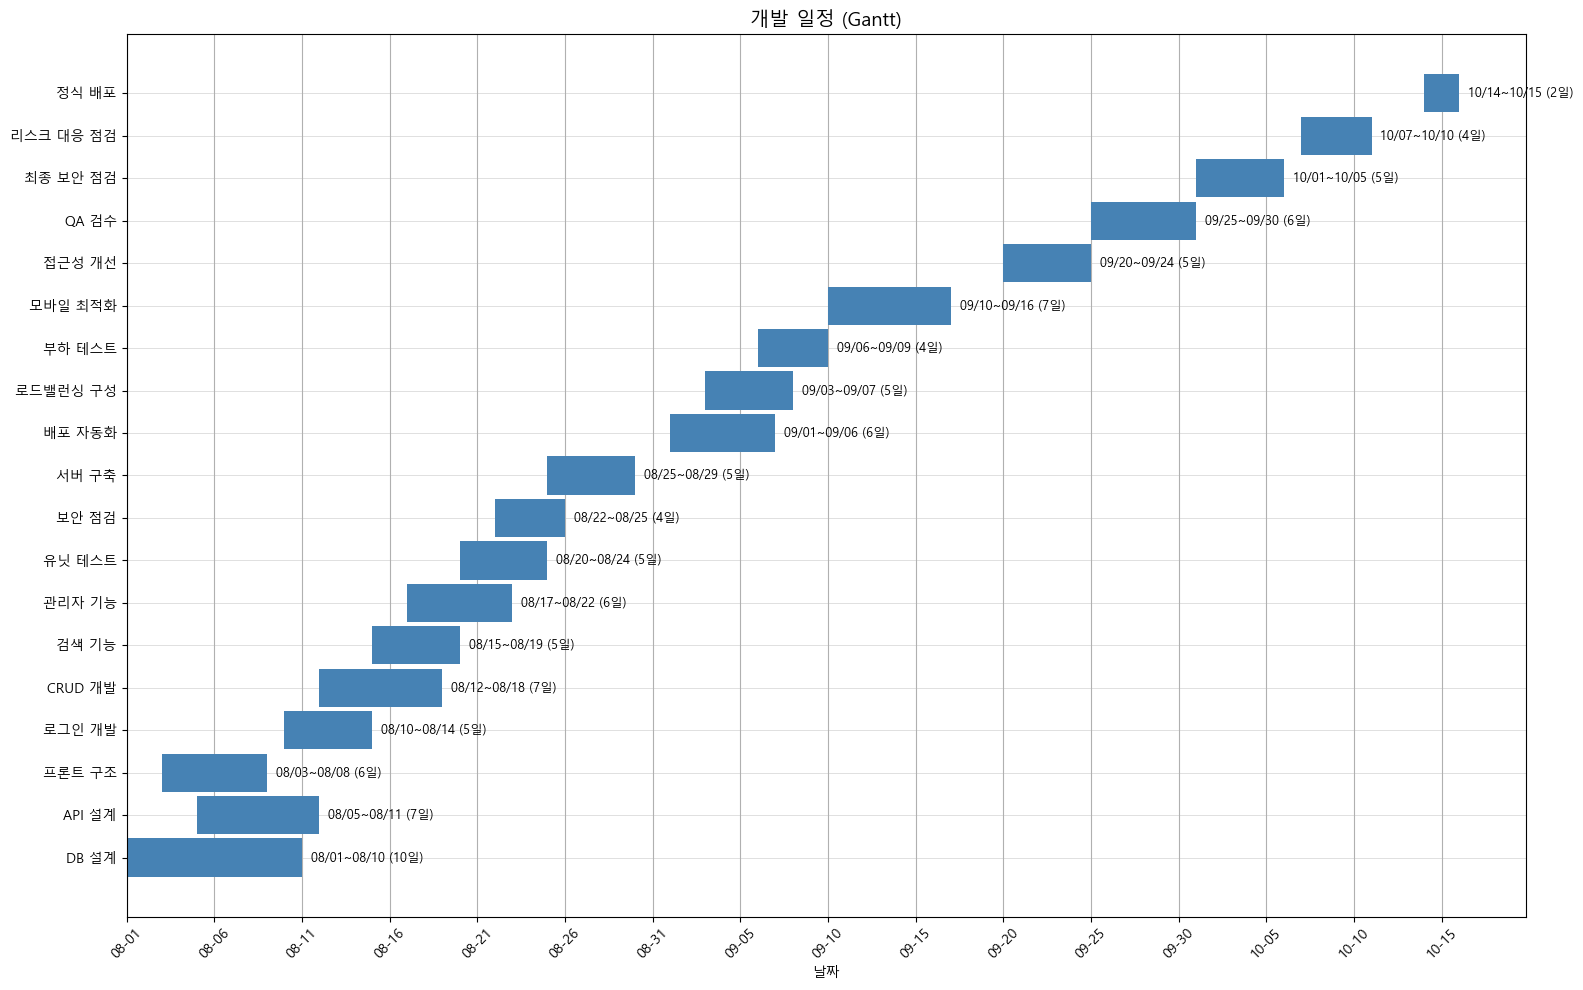

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib
from datetime import datetime, timedelta

matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

tasks = [
    ("DB 설계", "2025-08-01", 10),
    ("API 설계", "2025-08-05", 7),
    ("프론트 구조", "2025-08-03", 6),
    ("로그인 개발", "2025-08-10", 5),
    ("CRUD 개발", "2025-08-12", 7),
    ("검색 기능", "2025-08-15", 5),
    ("관리자 기능", "2025-08-17", 6),
    ("유닛 테스트", "2025-08-20", 5),
    ("보안 점검", "2025-08-22", 4),
    ("서버 구축", "2025-08-25", 5),
    ("배포 자동화", "2025-09-01", 6),
    ("로드밸런싱 구성", "2025-09-03", 5),
    ("부하 테스트", "2025-09-06", 4),
    ("모바일 최적화", "2025-09-10", 7),
    ("접근성 개선", "2025-09-20", 5),
    ("QA 검수", "2025-09-25", 6),
    ("최종 보안 점검", "2025-10-01", 5),
    ("리스크 대응 점검", "2025-10-07", 4),
    ("정식 배포", "2025-10-14", 2),
]

df = pd.DataFrame(tasks, columns=["Task", "Start", "Duration"])
df["Start"] = pd.to_datetime(df["Start"])
df["End"] = df["Start"] + pd.to_timedelta(df["Duration"], unit="D")
df["Label"] = df.apply(lambda r: f"{r['Start'].strftime('%m/%d')}~{(r['End'] - timedelta(days=1)).strftime('%m/%d')} ({r['Duration']}일)", axis=1)

fig, ax = plt.subplots(figsize=(16, 10))
ax.set_axisbelow(True)

for i, row in df.iterrows():
    ax.axhline(y=i, color='lightgray', linewidth=0.5, zorder=0)

for i, row in df.iterrows():
    ax.barh(i, row["Duration"], left=row["Start"], height=0.9, color="steelblue", zorder=1)
    ax.text(row["End"] + timedelta(days=0.5), i, row["Label"], va='center', ha='left', fontsize=9, color='black', zorder=2)

ax.set_yticks(range(len(df)))
ax.set_yticklabels(df["Task"])

ax.set_xlabel("날짜")
ax.set_title("개발 일정 (Gantt)", fontsize=14)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xticks(rotation=45)
plt.grid(axis='x', zorder=0)
plt.tight_layout()
plt.show()
